<a href="https://colab.research.google.com/github/aryachiranjeev/MNIST-dataset/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [269]:
import os
work_dir = "/content/TensorFlow-Tutorials/"
if os.getcwd() != work_dir:
    !git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials.git
os.chdir(work_dir)

fatal: destination path 'TensorFlow-Tutorials' already exists and is not an empty directory.


In [0]:
#convolution layer 1
filter_size1=5
num_filters1=16
#convolution layer 2
filter_size2=5
num_filters2=36
#fully_connected layers
fc_layer_size=128

In [0]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

In [272]:

print("Training-set:{}".format(data.num_train))
print("Validation-set:t{}".format(data.num_val))
print("Test-set:{}".format(data.num_test))

Training-set:55000
Validation-set:t5000
Test-set:10000


In [273]:
img_size=data.img_size
img_size_flat=data.img_size_flat
img_shape=data.img_shape
num_classes=data.num_classes
num_channels=data.num_channels
print("img_size=",img_size)
print("img_size_flat=",img_size_flat)
print("img_shape=",img_shape)
print("num_channels=",num_channels)
print("num_classes=",num_classes)

img_size= 28
img_size_flat= 784
img_shape= (28, 28)
num_channels= 1
num_classes= 10


In [0]:
def plot_images(images,cls_true,cls_pred=None):
  assert len(images) == len(cls_true)==9
  fig,axes=plt.subplots(3,3)
  fig.subplots_adjust(hspace=0.5,wspace=0.5)
  for i,ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(img_shape),cmap='gray')
    if cls_pred is None:
      x_label="true:{0}".format(cls_true[i])
    else:
        x_label="true:{0},pred:{1}".format(cls_true[i],cls_pred[i])
    ax.set_xlabel(x_label)
    ax.set_xticks([])
    ax.set_yticks([])
      
  plt.show()  

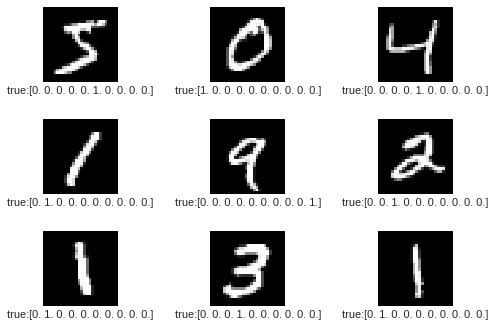

In [275]:
images=data.x_train[0:9]
cls_true=(data.y_train[0:9])
plot_images(images,cls_true)

In [0]:
#creating weight and bias variables
def new_weights(shape):
  return tf.Variable(tf.truncated_normal(shape,stddev=0.05))

def new_biases(length):
  return tf.Variable(tf.constant(0.05,shape=[length]))
  


In [0]:
#create convolution and maxpool layer structure

def new_conv_layer(input,num_input_channels,filter_size,num_filters,use_pooling=True):
  
  #shape of filters
  shape=[filter_size,filter_size,num_input_channels,num_filters]
  
  #calling and bias
  
  weights=new_weights(shape=shape)
  biases=new_biases(length=num_filters)
  
  #creating structure of conv_layer with no padding=same,stride(1,1)
  
  layer=tf.nn.conv2d(input=input,filter=weights,strides=[1,1,1,1],padding='SAME')
  
  #adding bias to layer
  layer=layer+biases
  
  #pooling
  if use_pooling:
    layer=tf.nn.max_pool(value=layer,ksize=[1,2,3,1],strides=[1,2,2,1],padding='SAME')
    
  #relu(to remove -ve terms)  
  layer=tf.nn.relu(layer)
  
  return layer,weights
  

In [0]:
#flattening layer

def flatten_layer(layer):
  layer_shape=layer.get_shape()
  
  #layer_shape=[num_input_chanels,img_height,img_width,num_output_channels]
  
  print("layer_shape=",layer_shape)
  
  #num_fateures=img_height*img_width*num_output_channels followed by num_elements() to find no. of elements
  
  num_features=layer_shape[1:4].num_elements()
  
  # Reshape the layer to [num_images, num_features].
  # Note that we just set the size of the second dimension
  # to num_features and the size of the first dimension to -1
  # which means the size in that dimension is calculated
  # so the total size of the tensor is unchanged from the reshaping.
  
  layer_flat=tf.reshape(layer,[-1,num_features])
  
  # The shape of the flattened layer is now:
  # [num_images, img_height * img_width * num_channels]
    
  return layer_flat,num_features
    

In [0]:
#fc_layer structure

def fc_layer(input,num_inputs,num_outputs,use_relu=True):
  #creating new weight and biases
  weights=new_weights(shape=[num_inputs,num_outputs])
  biases=new_biases(length=num_outputs)
  
  layer=tf.matmul(input,weights)+biases
  
  if use_relu:
    layer=tf.nn.relu(layer)
    
  return layer

In [0]:
#placeholders

x=tf.placeholder(tf.float32,shape=[None,img_size_flat],name='x')

x_image=tf.reshape(x,[-1,img_size,img_size,num_channels]) #reshaping x

y_true=tf.placeholder(tf.float32,shape=[None,num_classes],name='y_true') #creating place for true labels,onehot-encoded

y_true_cls=tf.argmax(y_true,axis=1) #converting to decimal


In [0]:
#conv1
layer_conv1,weights_conv1 =new_conv_layer(input=x_image, num_input_channels=num_channels,filter_size=filter_size1,num_filters=num_filters1,use_pooling=True)
     

In [282]:
print("layer_conv1=",layer_conv1)
print("weights_conv1=",weights_conv1)

layer_conv1= Tensor("Relu_21:0", shape=(?, 14, 14, 16), dtype=float32)
weights_conv1= <tf.Variable 'Variable_56:0' shape=(5, 5, 1, 16) dtype=float32_ref>


In [0]:
#conv2
layer_conv2,weights_conv2= new_conv_layer(input=layer_conv1, num_input_channels=num_filters1, filter_size=filter_size2, num_filters=num_filters2, use_pooling=True)

In [284]:
print("layer_conv2=",layer_conv2)
print("weights_conv2=",weights_conv2)

layer_conv2= Tensor("Relu_22:0", shape=(?, 7, 7, 36), dtype=float32)
weights_conv2= <tf.Variable 'Variable_58:0' shape=(5, 5, 16, 36) dtype=float32_ref>


In [285]:
#flatten_layer
layer_flat, num_features=flatten_layer(layer_conv2)


layer_shape= (?, 7, 7, 36)


In [286]:
print("layer_flat=",layer_flat)
print("num_features=",num_features)

layer_flat= Tensor("Reshape_15:0", shape=(?, 1764), dtype=float32)
num_features= 1764


In [0]:
#fc1
layer_fc1=fc_layer(input=layer_flat,num_inputs=num_features,num_outputs=fc_layer_size,use_relu=True)

In [288]:
print("layer_fc1=",layer_fc1)

layer_fc1= Tensor("Relu_23:0", shape=(?, 128), dtype=float32)


In [0]:
#fc2
layer_fc2=fc_layer(input=layer_fc1, num_inputs=fc_layer_size, num_outputs=num_classes, use_relu=False)

In [290]:
print("layer_fc2=",layer_fc2)

layer_fc2= Tensor("add_31:0", shape=(?, 10), dtype=float32)


In [0]:
y_pred=tf.nn.softmax(layer_fc2)

In [0]:
y_pred_cls=tf.argmax(y_pred,axis=1)

In [0]:
#cross_entropy
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,labels=y_true)

In [0]:

#loss
cost=tf.reduce_mean(cross_entropy)

In [0]:
#optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

In [0]:
#correct_prediction
correct_prediction=tf.equal(y_pred_cls,y_true_cls)

In [0]:
#accuracy
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [0]:
sess=tf.Session()
init=sess.run(tf.global_variables_initializer())


In [0]:
train_batch_size=64

In [0]:
total_iterations = 0

def optimize(num_iterations):
  global total_iterations
  for i in range(total_iterations, total_iterations+num_iterations):
    x_batch,y_true_batch,_=data.random_batch(batch_size=train_batch_size)
    feed_dict_train={x:x_batch,y_true:y_true_batch}
    sess.run(optimizer,feed_dict=feed_dict_train)
    if(i%100==0):
      acc=sess.run(accuracy,feed_dict=feed_dict_train)
      print("optimization iteration:{0:>6},training accuracy:{1:>6.1%}".format(i+1,acc))
      #print("loss:{}".format(cost))
  total_iterations += num_iterations

In [301]:
optimize(10000)

optimization iteration:     1,training accuracy:  6.2%
optimization iteration:   101,training accuracy:  6.2%
optimization iteration:   201,training accuracy: 10.9%
optimization iteration:   301,training accuracy:  9.4%
optimization iteration:   401,training accuracy:  6.2%
optimization iteration:   501,training accuracy: 14.1%
optimization iteration:   601,training accuracy: 14.1%
optimization iteration:   701,training accuracy: 17.2%
optimization iteration:   801,training accuracy: 32.8%
optimization iteration:   901,training accuracy: 26.6%
optimization iteration:  1001,training accuracy: 37.5%
optimization iteration:  1101,training accuracy: 50.0%
optimization iteration:  1201,training accuracy: 37.5%
optimization iteration:  1301,training accuracy: 46.9%
optimization iteration:  1401,training accuracy: 51.6%
optimization iteration:  1501,training accuracy: 45.3%
optimization iteration:  1601,training accuracy: 54.7%
optimization iteration:  1701,training accuracy: 59.4%
optimizati

In [0]:
#test examples error and correct
def plot_example_errors(cls_pred, uwant):
    
    #to check whether predicted class == true class
    
    images = data.x_test[uwant]
     
    cls_pred = cls_pred[uwant]

    cls_true = data.y_test_cls[uwant]
    
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
#test_data_performance

test_batch_size=256
def print_test_accuracy():
  num_test=data.num_test
  cls_pred=np.zeros(shape=num_test,dtype=np.int)
  
  #working on test_batch_size
  #starting index of next batch at i
  i=0
  
  while(i<num_test):
     # The ending index for the next batch is denoted j
      j=min(i+test_batch_size,num_test)
      #get images and labels of particular test_batch
      images= data.x_test[i:j,:]
      labels=data.y_test[i:j,:]
      
      #calculate predicted class
      cls_pred[i:j]= sess.run(y_pred_cls,feed_dict={x:images, y_true:labels})
      
      #set the start index fro the next batch
      #end index of current batch
      i=j
      
  cls_true=data.y_test_cls
  
  correct=(cls_true==cls_pred)
  incorrect=(cls_true!=cls_pred)
  #sum of correctly classified images
  correct_sum =correct.sum()
  
  acc=float(correct_sum)/num_test
  
  print("accuracy on testset:{0:.1%} ({1}/{2})".format(acc,correct_sum,num_test))
  print("correct prediction::")
  plot_example_errors(cls_pred=cls_pred, uwant=correct)
  print("incorrect prediction::")
  plot_example_errors(cls_pred=cls_pred, uwant=incorrect)


accuracy on testset:93.7% (9366/10000)
correct prediction::


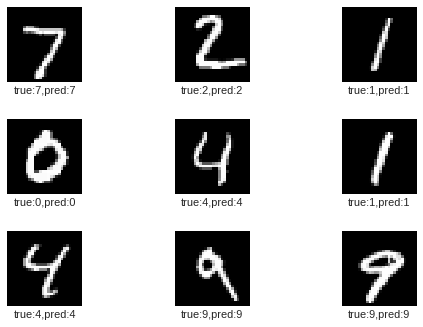

incorrect prediction::


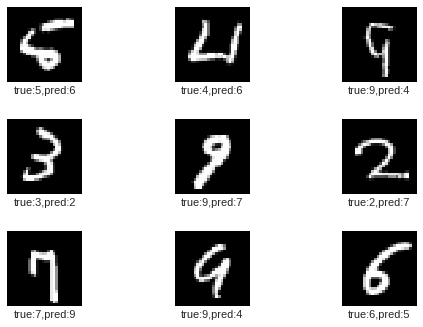

In [304]:
print_test_accuracy()

In [0]:

#plot weights
import math
def plot_conv_weights(weights, input_channel=0):
   
    w = sess.run(weights)

    # lowest and highest values for the weights.to corect colour intensity across images so they can be compared
  
    w_min = np.min(w)
    w_max = np.max(w)

    # No. of filters used in the convlayer
    num_filters = w.shape[3]

    # Number of grids to plot
    # Rounded-up, square-root of the number of filters
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights
        if i<num_filters:
            # Get the weights for the i filter of the input channel
           
            img = w[:, :, input_channel, i]

            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest',cmap='gray')# cmap='seismic')
        
        ax.set_xticks([])
        ax.set_yticks([])
   
    plt.show()

In [0]:
#plot convlayer
def plot_conv_layer(layer, image):
   
    feed_dict0 = {x: [image]}

    values = sess.run(layer, feed_dict=feed_dict0)

    num_filters = values.shape[3]

    num_grids = math.ceil(math.sqrt(num_filters))
   
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = values[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='gray')
     
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

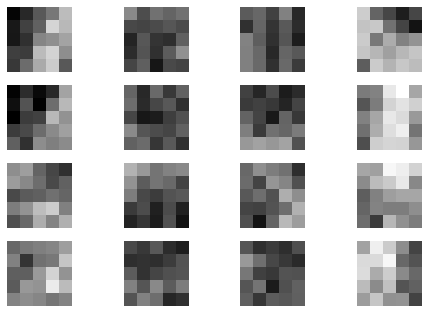

In [307]:
plot_conv_weights(weights=weights_conv1)

In [0]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='gray')
    plt.axis('off')

    plt.show()

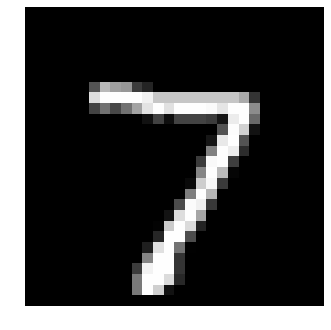

In [309]:
image1 = data.x_test[0]
plot_image(image1)


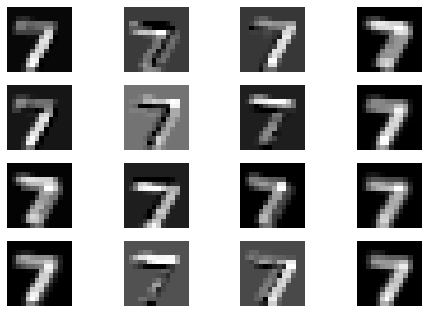

In [310]:
plot_conv_layer(layer=layer_conv1, image=image1)

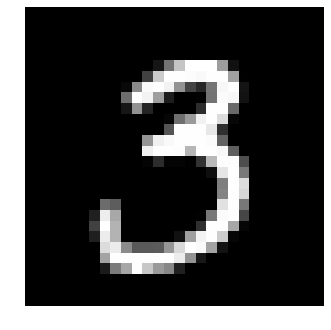

In [311]:
image1 = data.x_test[90]
plot_image(image1)

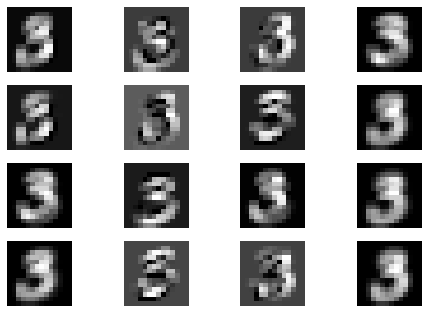

In [312]:
plot_conv_layer(layer=layer_conv1, image=image1)